In [1]:
#libraries used for web scraping below
import matplotlib.pyplot as plt
import selenium
import numpy as np
import pandas as pd
import argparse
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys 

In [2]:
driver = webdriver.Chrome('C:\\Users\\iderjit\\Downloads\\chromedriver_win32\\chromedriver')
driver.get('https://www.instagram.com/')


In [3]:
#login to instagram
import time
loginIdinput = driver.find_element_by_name('username')
loginIdinput.send_keys('9899960574') #Replace sample_mail_id with your email id
Pass = driver.find_element_by_name('password')
Pass.send_keys('staytuned') #Replace sample_password with your password
driver.find_element_by_class_name('Igw0E.IwRSH.eGOV_._4EzTm.bkEs3.CovQj.jKUp7.DhRcB').click()
time.sleep(10)

### Q1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

#### Q1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [4]:
#searching for "food" again in the search bar and storing the top 10 usernames in a list
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//span[contains(@class, "TqC_a")]')))
time.sleep(2)
driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys('food')
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="Ap253"]')))
time.sleep(3)

In [5]:
count=0
users=[]
# list of top 10 users will be stored in this list.
for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
    user_n=i.get_attribute('innerHTML')
    if user_n[0]!='#' and count<10:
        users.append(i.get_attribute('innerHTML'))
        count+=1

driver.find_element_by_xpath('//div[contains(@class, "coreSpriteSearchClear")]').click()

#now i will iterate through all the usernames in this list and do whatever is asked in the question
followers=[]
#this list will contain the number of followers of 10 users.


for user in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="-nal3 "]/span[@class="g47SY "]')))
    followers.append(driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('innerHTML'))
    time.sleep(3.2)
#now finally we have 2 arrays with usernames of users and their followers as a string. we need to convert this string into...
#an integer somehow.

In [6]:
print(users)
print(followers)

['foodtalkindia', 'foodiesince96', 'food_belly11', 'foodiekaurexpeditions', 'dilsefoodie', 'food_from_devpreet_kitchen', 'food', 'food_lunatic', 'foodbossindia', 'eatorpassfoodie']
['298k', '298k', '253k', '7,008', '3,641', '557k', '298k', '298k', '88.4k', '155k']


In [7]:

for i in range(len(followers)):
    if not 'k' in followers[i]:
        followers[i]=int("".join(followers[i].split(',')))
    else:
        followers[i]=float(followers[i][:-1])*1000
followers=np.array(followers, dtype='int')
users=np.array(users)
#sorted in ascending order
users=users[np.argsort(followers)][::-1]
followers=followers[np.argsort(followers)][::-1]
#now printing top 5 
top5=[]
for x in range(5):
    print(users[x])
    top5.append(users[x])
#following is a list of users with highest number of followers among those top 10.

food_from_devpreet_kitchen
food_lunatic
food
foodiesince96
foodtalkindia


### From the above result we can infer that amongst the first 10 instagram handles of food the top 5 handles that have the most no of followers are: food_from_devpreet_kitchen, food_lunatic, food, foodiesince96,foodtalkindia.

#### Q1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [8]:
post=[]
def get_posts(driver,usernames, n):
    wait = WebDriverWait(driver, 10)
    d = {}
    #post=[]
    ## Looping through the users 
    
    for i in usernames:
        driver.get('https://www.instagram.com/' + i)
        key = i 
        try:
            driver.find_element_by_xpath('//div[@class = "v1Nh3 kIKUG  _bz0w"]/a')  ##Finding first pic
        except NoSuchElementException:
            count = 0                         ## If not found then 0 posts are assigned and loop is not further continued
            d[i]= count
            continue
        
        ## clicking the first pic
        first_pic = driver.find_elements_by_xpath('//div[@class = "v1Nh3 kIKUG  _bz0w"]/a')[0]
        first_pic.click()                         
        
        wait.until(EC.presence_of_element_located((By.TAG_NAME,'time')))
        
         ## Getting the time during which the post was posted
        t = driver.find_elements_by_tag_name('time')[-1].text.split(' ')[1]  
        
        count = 0
        
        while (t=='HOURS'  or t=='HOUR' or t=='DAYS' or t=='DAY' or t=='MINUTES' or t=='MINUTE' or t=='SECONDS' or t=='SECOND'):
            
            ## Updating count after checking  for appropriate tags
            if t=='HOURS' or t=='HOUR'or t=='MINUTES' or t=='MINUTE' or t=='SECONDS' or t=='SECOND' or t=='DAY':
                count+=1        

            elif t=='DAYS':
                if float(driver.find_elements_by_tag_name('time')[-1].text.split(' ')[0])<=n:
                    count+=1
                      ## if post is exceeding the time limit 
                else:                                                            ## then closing the pic and breaking from loop            
                    break
            else:
                              
                break
            
            ## going to next pic
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()  
            wait.until(EC.presence_of_element_located((By.TAG_NAME,'time')))      
            
            t = driver.find_elements_by_tag_name('time')[-1].text.split(' ')[1]   ## Updating the time tag
        
        ## adding the username with number of posts to dictionary
        d[key] = count                  
    
    ## Printing the info
    for k,v in d.items():
        print(k,v)                 
        post.append(v)

 

In [9]:
top5=['food_from_devpreet_kitchen', 'food_lunatic', 'food', 'foodiesince96','foodtalkindia']
n=3
get_posts(driver,top5, n)
print(post)

foodtalkindia 4
food_from_devpreet_kitchen 4
food 8
food_lunatic 7
foodiesince96 9
[4, 4, 8, 7, 9]


#### Q1.3 Depict this information using a suitable graph.

In [10]:
post=np.array(post)
post

array([4, 4, 8, 7, 9])

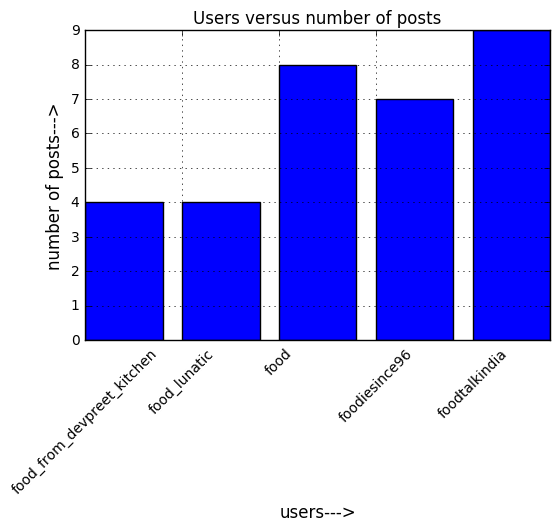

In [11]:
%matplotlib inline
#graph between top 5 users and the number of posts
top5=['food_from_devpreet_kitchen', 'food_lunatic', 'food', 'foodiesince96','foodtalkindia']
pos=[4,4,8,7,9]
arr=range(len(top5))
plt.xticks(arr,top5)
plt.xticks(rotation=45)
plt.title('Users versus number of posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.bar(arr,pos)
plt.grid()
plt.show()


### Q2. Your friend also needs a list of hashtags that he should use in his posts.

#### Q2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [12]:
#iterating through the list of top 5 users with maximum followers
#and counting the number of posts they have done in past 3 days
top5=['food_from_devpreet_kitchen', 'food_lunatic', 'food', 'foodiesince96','foodtalkindia']
dictn = {}
for user in top5:
    
    li = []
    hashtags=[]
    
    driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]').clear()
    time.sleep(1)
    driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]').send_keys(user)
    
    wait=WebDriverWait(driver,10)
    profile=wait.until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"yCE8d")]')))
    profile.click()
    time.sleep(3)

    s=driver.find_element_by_class_name('_9AhH0')
    s.click()
    time.sleep(5)
    
    caption=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
    li.append(caption.text)
    
      
    for j in range(9):
        
        nxt=driver.find_element_by_xpath('//a[contains(@class,"_65Bje ")]')
        nxt.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        wait=WebDriverWait(driver,10)
        caption=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]/span')))
        li.append(caption.text.strip())
        
        
    close=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"BI4qX")]/button')))
    close.click()
    
    dictn[user]=li
    

print(dictn)

{'foodtalkindia': ['What on earth 😂. I love Sushi', 'Happy International Beer Day, folks!\nA day to celebrate beer in all its fizzy glory, with some fun beer games… 🍻 #InternationalBeerDay #beerstagram\n\n1. Flip Cup - What you need: Beers, cups\n\nFlip Cup is a good starter for a house party! There are two teams competing against each other. Both teams stand on opposite sides of the table and keep their cups with drinks at the edge. Everyone must finish their drink and flip the cup, upside-down before the next member begins. First team to complete this wins.\n\n2. Buzz- What you need: Beers\n\nOne of the easiest games, each player starts counting a number and says it aloud, except 7 and its multiples, in which case, you say buzz. If you don\'t, you drink your beer. Simple!\n\n3. Most Likely - What you need: Beers\n\nThe group sits in a circle and asks a \'most likely\' question. For example, "Who would be most likely to fart in front of strangers?" After counting to three, everyone po

#### Q2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [16]:
import requests
from bs4 import BeautifulSoup
d = {}
top5=['food_from_devpreet_kitchen', 'food_lunatic', 'food', 'foodiesince96','foodtalkindia']

for k in top5:
    
    ###searching the page 
    searchwriter = driver.find_element_by_xpath('//input[contains(@class, "x3qfX")]')
    searchwriter.send_keys(k)

    time.sleep(2)

    button = driver.find_element_by_class_name('Ap253')
    button.click()
    
    time.sleep(4)

    post = driver.find_elements_by_class_name('_9AhH0')

    for i in range(10):
        
        button1 = post[i]
        driver.execute_script("arguments[0].click();", button1)
    

        time.sleep(3)

        post_content = driver.find_element_by_xpath('//div[starts-with(@class, "C4VMK")]/span')
        html = post_content.get_attribute('outerHTML')

        time.sleep(2)

        driver.back()

        data = BeautifulSoup(html, 'html.parser')

        str1 = data.get_text()
        list1 = str1.split()

        for i in list1:
            if i not in d:
                d[i] = 1
            else:
                d[i] += 1
    
    driver.get('https://www.instagram.com/')
    time.sleep(3)
        
d

{'Everyone': 2,
 'FOR': 2,
 '@figandmapledelhi': 2,
 'Caramel-': 2,
 'each': 12,
 'Beers,': 2,
 'broccoli': 1,
 'uploading': 1,
 'smooth.Step': 2,
 'straight': 6,
 'surely': 2,
 'has': 6,
 'other.': 2,
 'about': 2,
 '7700972445/': 2,
 'crust,': 2,
 'sale': 3,
 'amazing': 1,
 'Buzz-': 2,
 'Beers.4.': 2,
 '30': 2,
 'long': 1,
 'Granny': 2,
 'Chardonnays': 2,
 'recipes': 2,
 "Today's": 1,
 'Bag': 1,
 'Story': 2,
 'flat': 1,
 'offer': 2,
 '#immunebooster': 1,
 '💫💫': 8,
 '🍕\U0001f959🍛🌯': 2,
 'creamy': 4,
 '#appetizers': 1,
 'This': 2,
 '#Sister': 1,
 'tend': 2,
 'Essentials-': 2,
 '#paneerbhurji': 1,
 'love': 5,
 'super': 2,
 'Buy2Get1': 1,
 '#chefs': 1,
 'Foodiesince96': 8,
 '#chickenlollypops🍗': 1,
 'down': 1,
 'sipper': 2,
 'member': 3,
 'totally': 2,
 'se': 1,
 'Choco': 2,
 'beer.': 2,
 'home': 7,
 'served': 2,
 'News': 2,
 'lengthwise.': 2,
 'BeersThe': 2,
 'badly': 1,
 'Become': 1,
 'let': 3,
 'pancakes': 2,
 'we': 1,
 '8595332554': 2,
 '@kylinexperienceofficial': 2,
 '#WeekendVibes':

#### Q2.3 Create a csv file with two columns : the word and its frequency

In [17]:


###Part-3
###Create a csv file with two columns : the word and its frequency
##################################################################
list1 = []

for key, value in d.items():
    list1.append([key,value])
list1

import pandas as pd

df = pd.DataFrame(list1,columns = ['Word','Frequency'])

df.to_csv('wordfrequency.csv', index = False)

#### Q2.4 Now, find the hashtags that were most popular among these bloggers

In [18]:
###Part-4
####Now, find the hashtags that were most popular among these bloggers
########################################################################
df_copy = df.copy()

df_hashtag = df_copy[df_copy['Word'].str.contains("#")]

df_pie = df_hashtag.sort_values('Frequency', ascending=False)

df_pie

,Word,Frequency
964,#foodstagram,20
789,#foodblogger,18
826,#feedfeed,13
1063,#foodie,10
225,#delhi_igers,10
378,#foodgasm,10
980,#recipe,10
989,#foodiesince96,10
337,#instafood,9
227,#delhigram,9


#### Q2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [19]:
pd2=np.array(df_pie)
pd2[:5]

array([['#foodstagram', 20],
       ['#foodblogger', 18],
       ['#feedfeed', 13],
       ['#foodie', 10],
       ['#delhi_igers', 10]], dtype=object)

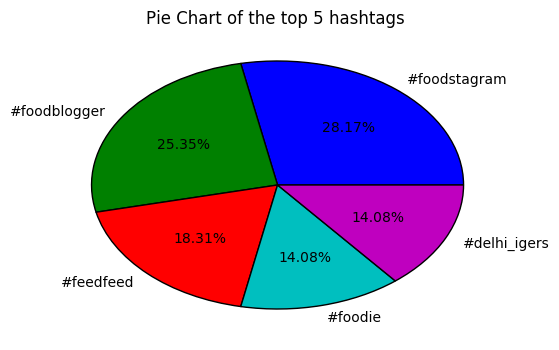

In [20]:
x=['#foodstagram','#foodblogger','#feedfeed','#foodie','#delhi_igers']
y=[20,18,13,10,10]
#plt.figure(figsize=(10,10))
plt.pie(y, labels=x, autopct='%.2f%%')
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

### Q3. You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

#### Q3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [22]:
from selenium.common.exceptions import NoSuchElementException ###instagram photos and videos work differently with likes therefore the exception
average_likes_list = []
top5=['food_from_devpreet_kitchen', 'food_lunatic', 'food', 'foodiesince96','foodtalkindia']
for k in top5:
    ##searching for page
    searchwriter = driver.find_element_by_xpath('//input[contains(@class, "x3qfX")]')
    searchwriter.send_keys(k)

    time.sleep(10)
    
    ##clicking button of the first entry that appears 
    button = driver.find_element_by_class_name('z556c')
    button.click()

    time.sleep(10)

    post = driver.find_elements_by_class_name('_9AhH0')
    
    average_likes = 0 ###this counter will contain average likes 
    
    for i in range(10):
        time.sleep(1)

        button = post[i]
        driver.execute_script("arguments[0].click();", button)
        
        time.sleep(10)
        
        ###if the post is a video then try would work, otherwise except would 
        try:
            views_button = driver.find_element_by_class_name('vcOH2')
            views_button.click()
            time.sleep(5)
            likes = driver.find_element_by_xpath('//div[@class = "vJRqr"]/span')
            like_count = likes.get_attribute('innerHTML')
            like_count = like_count.replace(',', '')
            like_count = int(like_count)
            average_likes += like_count
        except NoSuchElementException:
            likes = driver.find_element_by_xpath('//button[contains(@class, "_8A5w5")]/span')
            like_count = likes.get_attribute('innerHTML')
            like_count = like_count.replace(',', '')
            like_count = int(like_count)
    
            
        driver.back()
        time.sleep(3)
    print(k, like_count)
    driver.get('https://www.instagram.com/')
    time.sleep(3)


food_from_devpreet_kitchen 33
food_lunatic 1864
food 1015
foodiesince96 2692
foodtalkindia 1015


#### Q3.2 Calculate the average likes for a handle.

In [23]:
from selenium.common.exceptions import NoSuchElementException ###instagram photos and videos work differently with likes therefore the exception
average_likes_list = []
top5=['food_from_devpreet_kitchen','food_lunatic','food','foodiesince96','foodtalkindia']
for k in top5:
    ##searching for page
    searchwriter = driver.find_element_by_xpath('//input[contains(@class, "x3qfX")]')
    searchwriter.send_keys(k)

    time.sleep(10)
    
    ##clicking button of the first entry that appears 
    button = driver.find_element_by_class_name('z556c')
    button.click()

    time.sleep(10)

    post = driver.find_elements_by_class_name('_9AhH0')
    
    average_likes = 0 ###this counter will contain average likes 
    
    for i in range(10):
        time.sleep(1)

        button = post[i]
        driver.execute_script("arguments[0].click();", button)
        
        time.sleep(10)
        
        ###if the post is a video then try would work, otherwise except would 
        try:
            views_button = driver.find_element_by_class_name('vcOH2')
            views_button.click()
            time.sleep(5)
            likes = driver.find_element_by_xpath('//div[@class = "vJRqr"]/span')
            like_count = likes.get_attribute('innerHTML')
            like_count = like_count.replace(',', '')
            like_count = int(like_count)
            average_likes += like_count
        except NoSuchElementException:
            likes = driver.find_element_by_xpath('//button[contains(@class, "_8A5w5")]/span')
            like_count = likes.get_attribute('innerHTML')
            like_count = like_count.replace(',', '')
            like_count = int(like_count)
            average_likes += like_count
            
        driver.back()
        time.sleep(3)
    
    average_likes = average_likes//10
    average_likes_list.append(average_likes) ##appending average likes for a page into the list 
            
    driver.get('https://www.instagram.com/')
    time.sleep(3)

#####Average likes for a handle
for i in range(5):
    print(top5[i],average_likes_list[i])

food_from_devpreet_kitchen 38
food_lunatic 2067
food 3384
foodiesince96 5479
foodtalkindia 3384


#### Q3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [24]:
followers[0:5]

array([557000, 298000, 298000, 298000, 298000])

In [25]:
average_likes_list

[38, 2067, 3384, 5479, 3384]

In [26]:
#for getting average followers to likes ratio
ratio=followers[0:5]/average_likes
ratio

array([164.59810875,  88.06146572,  88.06146572,  88.06146572,
        88.06146572])

#### Q3.4 Create a bar graph to depict the above obtained information.

In [27]:
top5=np.array(top5)
top5

array(['food_from_devpreet_kitchen', 'food_lunatic', 'food',
       'foodiesince96', 'foodtalkindia'], dtype='<U26')

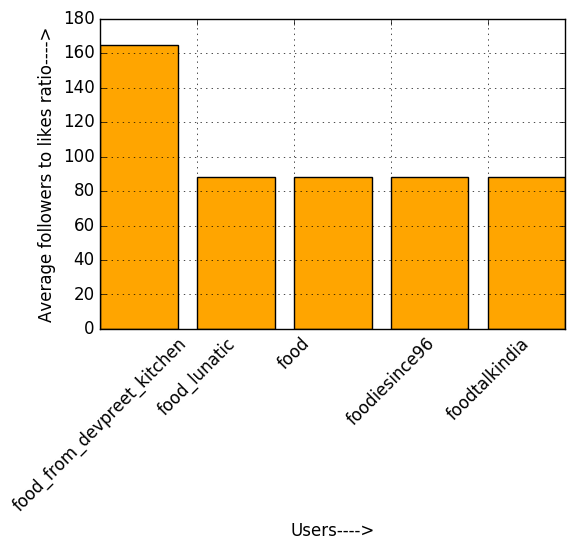

In [28]:
%matplotlib inline
#plotting the graph between average followers to the likes ratio and users.
top=['foodiekaurexpeditions','food_lunatic','food','foodiesince96','foodtalkindia']
arr=range(len(top5))
plt.xticks(arr,top5)
plt.xticks(rotation=45)
plt.bar(arr, ratio, color='orange')
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()